In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time
import os
import matplotlib.pyplot as plt 


In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)


11493376/11490434 [==============================] - 0s 0us/step


7-level convolutional network by LeCun et al in 1998

c1 produces as output 6 feature maps, and has a kernel size of 5x5.
s2 layer halves the dimension of the feature maps it receives from the previous layer; this is known commonly as downsampling. Also produces 6 feature maps, each one corresponding to the feature maps passed as input from the previous layer

The purpose of flatten layer is to transform its input to a 1-dimensional array that can be fed into the subsequent dense layers.


In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1 
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer Multi-class, single-label classification => softmax, returns an array of 10 probability scores

])

In [ ]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2186 - accuracy: 0.9348 - val_loss: 0.0973 - val_accuracy: 0.9698
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0600 - val_accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0588 - val_accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0364 - accuracy: 0.9884 - val_loss: 0.0536 - val_accuracy: 0.9828


In [ ]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0536 - accuracy: 0.9828


[0.053599707782268524, 0.9828000068664551]

In [ ]:
lenet_5_predictions = lenet_5_model.predict(test_x)
print(lenet_5_predictions[1])
print(np.argmax(lenet_5_predictions[1]))

[1.0803288e-06 2.9223288e-06 9.9995804e-01 2.1581936e-06 2.2051426e-08
 2.0388828e-08 4.5436200e-06 3.1516121e-09 3.1171712e-05 1.7954845e-09]
2


In [ ]:

lenet_5_predictions_list = []

fig=plt.figure(figsize=(15, 8))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    print(test_x[i])
    img = np.squeeze(test_x[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    print("predicted value:", np.argmax(lenet_5_predictions[i]), "with possibility", np.max(lenet_5_predictions[i])) 
    print("most possible values:", np.flip(np.argsort(lenet_5_predictions[i]))[:3])
    print("their possibility:", np.flip(np.sort(lenet_5_predictions[i]))[:3])
    if (i<6):
      lenet_5_predictions_sublist = ""
      for idx, val in enumerate(np.flip(np.argsort(lenet_5_predictions[i]))[:5]):
        top_vals = np.flip(np.argsort(lenet_5_predictions[i]))[:5]
        pred_result_string = (f'{np.flip(np.argsort(lenet_5_predictions[i]))[:5][idx]} {np.flip(np.sort(lenet_5_predictions[i]))[:5][idx]}') 
        lenet_5_predictions_sublist+=(pred_result_string) 
      lenet_5_predictions_list.append(lenet_5_predictions_sublist)
plt.show()
print(lenet_5_predictions_list) 



The network had a very similar architecture as LeNet by Yann LeCun et al but was deeper, with more filters per layer, and with stacked convolutional layers. It consisted 11x11, 5x5,3x3, convolutions, max pooling, dropout, data augmentation, ReLU activations, SGD with momentum. It attached ReLU activations after every convolutional and fully-connected layer.

In [ ]:
AlexModel = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
 

In [ ]:
AlexModel.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
AlexModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       38656     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 384)        

In [ ]:
AlexModel.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y))

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3862 - accuracy: 0.8789 - val_loss: 0.0755 - val_accuracy: 0.9759
Epoch 2/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1143 - accuracy: 0.9650 - val_loss: 0.0504 - val_accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0778 - accuracy: 0.9757 - val_loss: 0.0383 - val_accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0608 - accuracy: 0.9810 - val_loss: 0.0323 - val_accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0281 - val_accuracy: 0.9910


In [ ]:
AlexModel.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.9910


[0.028094958513975143, 0.9909999966621399]

In [ ]:
alex_predictions = AlexModel.predict(test_x)
print(alex_predictions[1])
print(np.argmax(alex_predictions[1]))

[2.96624312e-05 2.22892122e-04 9.99736249e-01 4.08822825e-06
 1.10914314e-07 2.22987122e-08 4.43862336e-06 1.38343682e-06
 1.11262602e-06 5.63812961e-08]
2


predicted value: 2 with possibility 0.99973625
most possible values: [2 1 0]
their possibility: [9.9973625e-01 2.2289212e-04 2.9662431e-05]
predicted value: 1 with possibility 0.9999684
most possible values: [1 7 4]
their possibility: [9.9996841e-01 1.4397696e-05 7.3638694e-06]
predicted value: 0 with possibility 0.9998845
most possible values: [0 6 9]
their possibility: [9.99884486e-01 1.11361915e-04 1.24058784e-06]
predicted value: 4 with possibility 0.99982697
most possible values: [4 9 1]
their possibility: [9.9982697e-01 1.6966558e-04 1.2471533e-06]
predicted value: 1 with possibility 0.99998724
most possible values: [1 7 4]
their possibility: [9.9998724e-01 8.1955350e-06 1.6007201e-06]


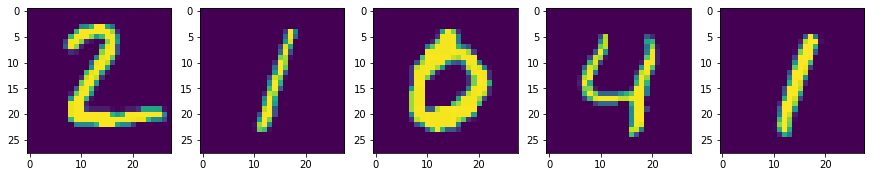

['2 0.99973624944686891 0.000222892122110351920 2.9662431188626215e-056 4.438623363967054e-063 4.088228251930559e-06', '1 0.9999684095382697 1.4397695849766023e-054 7.363869372056797e-066 3.259788172726985e-065 1.9887197595380712e-06', '0 0.99988448619842536 0.000111361914605367939 1.2405878351273714e-061 1.1661438747978536e-064 5.554975928134809e-07', '4 0.9998269677162179 0.000169665581779554491 1.2471532500057947e-067 8.330443961312994e-076 4.496745305004879e-07', '1 0.99998724460601817 8.195534974220209e-064 1.6007201111278846e-066 9.459104148845654e-070 8.573661602895299e-07']


In [ ]:
alex_predictions_list = []

fig=plt.figure(figsize=(15, 8))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = np.squeeze(test_x[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    print("predicted value:", np.argmax(alex_predictions[i]), "with possibility", np.max(alex_predictions[i])) 
    print("most possible values:", np.flip(np.argsort(alex_predictions[i]))[:3])
    print("their possibility:", np.flip(np.sort(alex_predictions[i]))[:3])
    if (i<6):
      alex_predictions_sublist = ""
      for idx, val in enumerate(np.flip(np.argsort(alex_predictions[i]))[:5]):
        top_vals = np.flip(np.argsort(alex_predictions[i]))[:5]
        pred_result_string = (f'{np.flip(np.argsort(alex_predictions[i]))[:5][idx]} {np.flip(np.sort(alex_predictions[i]))[:5][idx]}') 
        alex_predictions_sublist+=(pred_result_string) 
      alex_predictions_list.append(alex_predictions_sublist)
plt.show()
print(alex_predictions_list) 


In [ ]:
VGG16_model= keras.models.Sequential([
                                      
keras.layers.ZeroPadding2D((1,1),input_shape=(28, 28, 1)),
keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
keras.layers.MaxPool2D((2,2), strides=(2,2)),


keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D((2,2), strides=(2,2)),


keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D((2,2), strides=(2,2)),

keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D((2,2), strides=(2,2)),


keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D((2,2), strides=(2,2)),

keras.layers.Flatten(),
keras.layers.Dense(4096, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(4096, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation='softmax'),
]) 
 

In [ ]:
VGG16_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
VGG16_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 18, 128)      

In [ ]:
# VGG16_model.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y))

Epoch 1/5
1875/1875 [==============================] - 189s 101ms/step - loss: 2.3020 - accuracy: 0.1131 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 188s 100ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 188s 100ms/step - loss: 2.3008 - accuracy: 0.1124 - val_loss: 2.3005 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 188s 100ms/step - loss: 2.3006 - accuracy: 0.1124 - val_loss: 2.3002 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 188s 100ms/step - loss: 2.3003 - accuracy: 0.1124 - val_loss: 2.2999 - val_accuracy: 0.1135


didn't work, maybe too few epochs for a complex structure, let's try а simpler one

In [ ]:
VGG16_model1= keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
keras.layers.MaxPool2D(),
keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D(),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='sigmoid'),
]) 
 

In [ ]:
VGG16_model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

VGG16_model1.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2503 - accuracy: 0.2002 - val_loss: 2.1703 - val_accuracy: 0.3920
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5561 - accuracy: 0.6593 - val_loss: 0.6012 - val_accuracy: 0.8495
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4519 - accuracy: 0.8755 - val_loss: 0.3466 - val_accuracy: 0.9027
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3292 - accuracy: 0.9049 - val_loss: 0.2854 - val_accuracy: 0.9158
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.9175 - val_loss: 0.2504 - val_accuracy: 0.9266


In [ ]:
VGG16_model2= keras.models.Sequential([ 

keras.layers.ZeroPadding2D((1,1),input_shape=(28, 28, 1)),
keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
keras.layers.MaxPool2D(),


keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D((2,2), strides=(2,2)),

keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D(),

keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='sigmoid'),
]) 

In [ ]:
VGG16_model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

VGG16_model2.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 2.2997 - accuracy: 0.1754 - val_loss: 2.2958 - val_accuracy: 0.2524
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 2.2897 - accuracy: 0.3423 - val_loss: 2.2796 - val_accuracy: 0.4292
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 2.0676 - accuracy: 0.4808 - val_loss: 0.9062 - val_accuracy: 0.6973
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5062 - accuracy: 0.8373 - val_loss: 0.2850 - val_accuracy: 0.9138
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2699 - accuracy: 0.9168 - val_loss: 0.1968 - val_accuracy: 0.9370
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1931 - accuracy: 0.9402 - val_loss: 0.1780 - val_accuracy: 0.9415
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1535 - accuracy: 0.9526 - val_loss: 0.1571 - val_ac

In [ ]:
VGG16_model3= keras.models.Sequential([ 

keras.layers.ZeroPadding2D((1,1),input_shape=(28, 28, 1)),
keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
keras.layers.MaxPool2D(),


keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D((2,2), strides=(2,2)),


keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
keras.layers.ZeroPadding2D((1,1)),
keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPool2D((2,2), strides=(2,2)),

keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='sigmoid'),
]) 

In [ ]:
VGG16_model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

VGG16_model3.fit(train_x, train_y, epochs=20, validation_data=(test_x, test_y))

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 2.3015 - accuracy: 0.1139 - val_loss: 2.3006 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 2.2999 - accuracy: 0.1124 - val_loss: 2.2990 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 2.2981 - accuracy: 0.1124 - val_loss: 2.2965 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 2.2945 - accuracy: 0.1326 - val_loss: 2.2910 - val_accuracy: 0.2124
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 2.2837 - accuracy: 0.3058 - val_loss: 2.2688 - val_accuracy: 0.3421
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 1.7750 - accuracy: 0.4487 - val_loss: 0.5765 - val_accuracy: 0.8221
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4118 - accuracy: 0.8676 - val_loss: 0.2508 -

In [ ]:
VGG16_model3.evaluate(test_x, test_y)

313/313 [==============================] - 1s 5ms/step - loss: 0.0576 - accuracy: 0.9813


[0.05757991224527359, 0.9812999963760376]

The hypothesis is likely to be true, as we can see, as VGG model gets more complex, it starts to increase its accuracy later and later in the learning process

predictions:

In [ ]:
vgg_predictions = VGG16_model3.predict(test_x)
print(vgg_predictions[1])
print(np.argmax(vgg_predictions[1]))

[1.2622448e-10 3.1341329e-05 9.2456383e-01 3.3693563e-05 2.4289947e-12
 1.6741676e-11 4.2652211e-09 6.3850028e-12 4.3502229e-07 2.2548859e-14]
2


predicted value: 2 with possibility 0.9245638
most possible values: [2 3 1]
their possibility: [9.2456383e-01 3.3693563e-05 3.1341329e-05]
2 0.9245638251304626
vgg_predictions_sublist 2 0.9245638251304626
20
3 3.369356272742152e-05
vgg_predictions_sublist 2 0.92456382513046263 3.369356272742152e-05
43
1 3.1341329304268584e-05
vgg_predictions_sublist 2 0.92456382513046263 3.369356272742152e-051 3.1341329304268584e-05
67
8 4.350222866378317e-07
vgg_predictions_sublist 2 0.92456382513046263 3.369356272742152e-051 3.1341329304268584e-058 4.350222866378317e-07
90
6 4.265221065224978e-09
vgg_predictions_sublist 2 0.92456382513046263 3.369356272742152e-051 3.1341329304268584e-058 4.350222866378317e-076 4.265221065224978e-09
113
predicted value: 1 with possibility 0.14182219
most possible values: [1 7 4]
their possibility: [1.4182219e-01 7.9035548e-05 6.7533423e-05]
1 0.1418221890926361
vgg_predictions_sublist 1 0.1418221890926361
20
7 7.903554796939716e-05
vgg_predictions_sublist 1 0.14182218

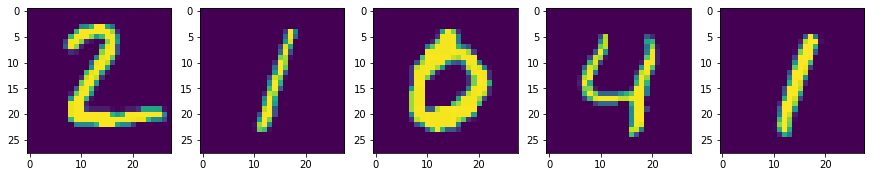

['2 0.92456382513046263 3.369356272742152e-051 3.1341329304268584e-058 4.350222866378317e-076 4.265221065224978e-09', '1 0.14182218909263617 7.903554796939716e-054 6.753342313459143e-056 5.916733789490536e-058 1.56561000039801e-05', '0 0.059474829584360122 6.969445109916705e-086 6.085308257297584e-089 5.061185603949525e-085 6.082160997067376e-09', '4 0.58727806806564339 5.788389898953028e-057 1.186509234685218e-051 5.121593176227179e-072 7.902614385102424e-08', '1 0.163386657834053047 7.720667781541124e-054 3.6376641219248995e-068 3.9282662100958987e-079 3.483522448277654e-07']


In [ ]:
vgg_predictions_list = []

fig=plt.figure(figsize=(15, 8))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = np.squeeze(test_x[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    print("predicted value:", np.argmax(vgg_predictions[i]), "with possibility", np.max(vgg_predictions[i])) 
    print("most possible values:", np.flip(np.argsort(vgg_predictions[i]))[:3])
    print("their possibility:", np.flip(np.sort(vgg_predictions[i]))[:3])
    if (i<6):
      vgg_predictions_sublist = ""
      for idx, val in enumerate(np.flip(np.argsort(vgg_predictions[i]))[:5]):
        top_vals = np.flip(np.argsort(vgg_predictions[i]))[:5]
        pred_result_string = (f'{np.flip(np.argsort(vgg_predictions[i]))[:5][idx]} {np.flip(np.sort(vgg_predictions[i]))[:5][idx]}')
        print(pred_result_string)
        vgg_predictions_sublist+=pred_result_string
        print("vgg_predictions_sublist",vgg_predictions_sublist)
        print(len(vgg_predictions_sublist))
      vgg_predictions_list.append(vgg_predictions_sublist)
plt.show()
print(vgg_predictions_list) 

table of predictions:

In [ ]:
print(alex_predictions_list)
print(vgg_predictions_list)
print(lenet_5_predictions_list)
final_results = []
final_results.append(alex_predictions_list)
final_results.append(vgg_predictions_list)
final_results.append(lenet_5_predictions_list)
print(final_results)

['2 0.99995803833007818 3.117171218036674e-056 4.543619979813229e-061 2.922328803833807e-063 2.158193638024386e-06', '1 0.99994540214538578 2.7378777303965762e-056 1.945362237165682e-057 4.79085611004848e-064 1.6130319409057847e-06', '0 0.99987566471099856 9.386595047544688e-055 9.209874406224117e-069 8.67352991917869e-062 6.377389127010247e-06', '4 0.99997985363006599 1.7599290004000068e-057 1.3517819752451032e-066 8.910643032322696e-078 1.1924332454782416e-07', '1 0.99989354610443128 5.302903809933923e-057 3.354571163072251e-056 1.47577002280741e-054 3.868940439133439e-06']
['2 0.92456382513046263 3.369356272742152e-051 3.1341329304268584e-058 4.350222866378317e-076 4.265221065224978e-09', '1 0.14182218909263617 7.903554796939716e-054 6.753342313459143e-056 5.916733789490536e-058 1.56561000039801e-05', '0 0.059474829584360122 6.969445109916705e-086 6.085308257297584e-089 5.061185603949525e-085 6.082160997067376e-09', '4 0.58727806806564339 5.788389898953028e-057 1.186509234685218e-05

[['2 0.99995803833007818 3.117171218036674e-056 4.543619979813229e-061 2.922328803833807e-063 2.158193638024386e-06', '1 0.99994540214538578 2.7378777303965762e-056 1.945362237165682e-057 4.79085611004848e-064 1.6130319409057847e-06', '0 0.99987566471099856 9.386595047544688e-055 9.209874406224117e-069 8.67352991917869e-062 6.377389127010247e-06', '4 0.99997985363006599 1.7599290004000068e-057 1.3517819752451032e-066 8.910643032322696e-078 1.1924332454782416e-07', '1 0.99989354610443128 5.302903809933923e-057 3.354571163072251e-056 1.47577002280741e-054 3.868940439133439e-06'], ['2 0.92456382513046263 3.369356272742152e-051 3.1341329304268584e-058 4.350222866378317e-076 4.265221065224978e-09', '1 0.14182218909263617 7.903554796939716e-054 6.753342313459143e-056 5.916733789490536e-058 1.56561000039801e-05', '0 0.059474829584360122 6.969445109916705e-086 6.085308257297584e-089 5.061185603949525e-085 6.082160997067376e-09', '4 0.58727806806564339 5.788389898953028e-057 1.186509234685218e-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


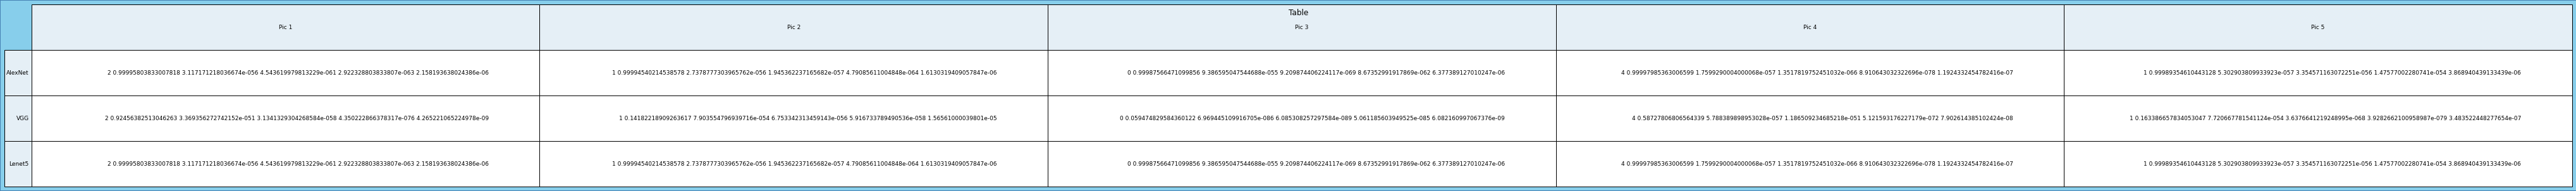

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
title_text = 'Table'
fig_background_color = 'skyblue'
fig_border = 'steelblue'
# Pop the headers from the data array
column_headers = ['Pic 1', 'Pic 2', 'Pic 3', 'Pic 4', 'Pic 5']
row_headers = ['AlexNet', 'VGG', 'Lenet5']
cell_text = final_results
print(cell_text)
print(len(cell_text))
# Get some lists of color specs for row and column headers
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# Create the figure. Setting a small pad on tight_layout
# seems to better regulate white space. Sometimes experimenting
# with an explicit figsize here can produce better outcome.
plt.figure(linewidth=2,
           edgecolor=fig_border,
           facecolor=fig_background_color,
           tight_layout={'pad':1},
           #figsize=(5,3)
          )
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')
# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(12, 6)
# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Hide axes border
plt.box(on=None)
# Add title
plt.suptitle(title_text) 
# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()


edit a number

In [ ]:
pip install pillow

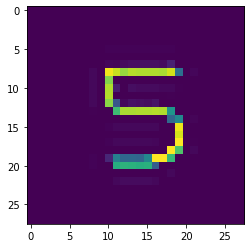

In [ ]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv] 
    return tva

#x=[imageprepare('/content/drive/My Drive/resized/4.jpg')]#file path here 
x=[imageprepare('image.png')]#file path here 
#Now we convert 784 sized 1d array to 24x24 sized 2d array so that we can visualize it
newArr=[[0 for d in range(28)] for y in range(28)]
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1


plt.imshow(newArr, interpolation='nearest') 
# plt.savefig('MNIST_IMAGE.png')#save MNIST image
plt.show()#Show / plot that image


# Новый раздел

[4.5022881e-07 2.5172761e-02 1.1949763e-06 8.2131875e-05 2.2707159e-04
 2.4648858e-04 9.4134748e-07 9.7422099e-01 2.7544159e-10 4.7908332e-05]
7


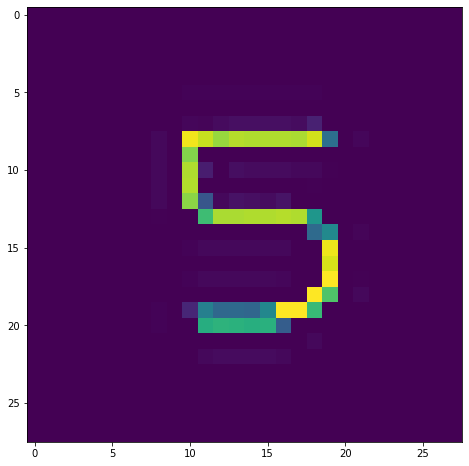

In [ ]:
first = np.asarray(newArr).reshape(1,28,28)
 
fig=plt.figure(figsize=(15, 8)) 
img = np.squeeze(first) 
plt.imshow(img)
  
result = np.zeros((1,28,28))
np.dstack((result,first))

result = result / 255.0  
result = tf.expand_dims(result, 3)  
  
alex_predictions = lenet_5_model.predict(result)  
 
print(alex_predictions[0])
print(np.argmax(alex_predictions[0])) 

In [ ]:
example = np.asarray(newArr).reshape(1, 28, 28)
example = example / 255.0  
example = tf.expand_dims(example, 3)  
  
alex_predictions = lenet_5_model.predict(example)  
 
print(alex_predictions[0])
print(np.argmax(alex_predictions[0])) 

[2.3239173e-07 2.3133058e-02 2.8654365e-06 1.2473526e-04 3.7585042e-04
 4.3999086e-04 1.1205971e-06 9.7588509e-01 4.2926074e-10 3.7029004e-05]
7


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
